In [35]:
import scipy
import logging
import atlite
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [36]:
import geopandas as gpd

In [37]:
from init import *

In [38]:
from src.config import *

In [6]:
# this is not really needed if we have a complete solution and concat script is executed

# import glob
# fnames = glob.glob(str(INTERIM_DIR / "network_solution"  / "*.nc"))
# solution = xr.open_mfdataset(fnames)

In [6]:
solution = xr.open_dataset(OUTPUT_DIR / "network_solution" / "network_solution.nc")

In [7]:
solution

<xarray.Dataset>
Dimensions:           (x: 40, y: 30)
Coordinates:
  * x                 (x) float64 20.0 20.25 20.5 20.75 ... 29.25 29.5 29.75
  * y                 (y) float64 35.0 35.25 35.5 35.75 ... 41.75 42.0 42.25
Data variables:
    size_wind         (x, y) float64 ...
    size_solar_pv     (x, y) float64 ...
    size_storage_co2  (x, y) float64 ...
    runtime_solver    (y, x) float64 ...
    runtime           (y, x) float64 ...

In [39]:
# this takes a while to run...
# mean_wind = wind.sel(x=solution.x, y=solution.y).mean(dim='time')['specific generation'].compute()

In [40]:
df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

Text(0.5, 1.0, 'mean capacity factors for wind above 0.37')

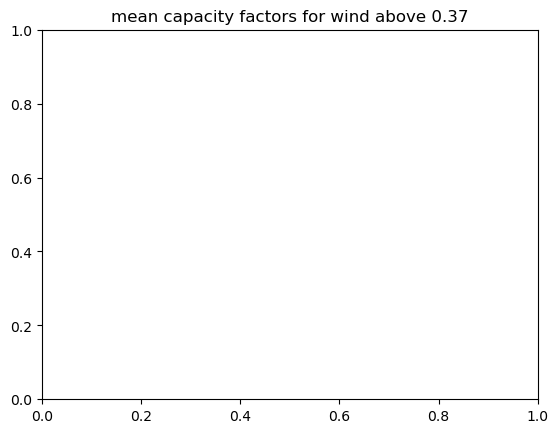

In [41]:
#mean_wind.where(mean_wind > 0.37).plot()
plt.title('mean capacity factors for wind above 0.37')

In [42]:
import glob
fnames = glob.glob(str(INTERIM_DIR / "network_solution-2023-06-08_cplex"  / "*.nc"))
solution = xr.open_mfdataset(sorted(fnames[:-15]))

In [43]:
import glob
fnames = glob.glob(str(INTERIM_DIR / "network_solution-2023-06-08_gurobi"  / "*.nc"))
solution = xr.open_mfdataset(sorted(fnames[:-15]))

In [44]:
import glob
fnames = glob.glob(str(INTERIM_DIR / "network_solution"  / "*.nc"))
solution = xr.open_mfdataset(sorted(fnames))

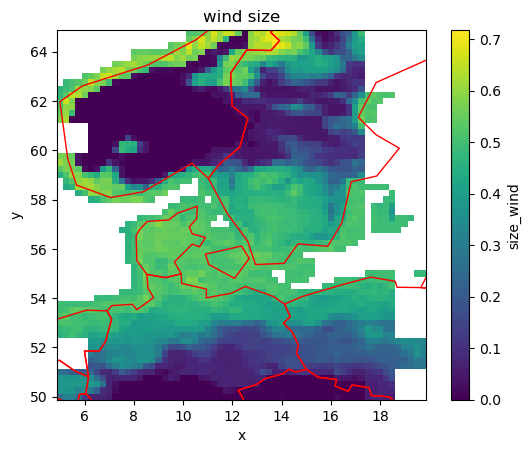

In [45]:
fig, ax = plt.subplots(1)

solution.size_wind.transpose('y', 'x').plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)
plt.title('wind size');

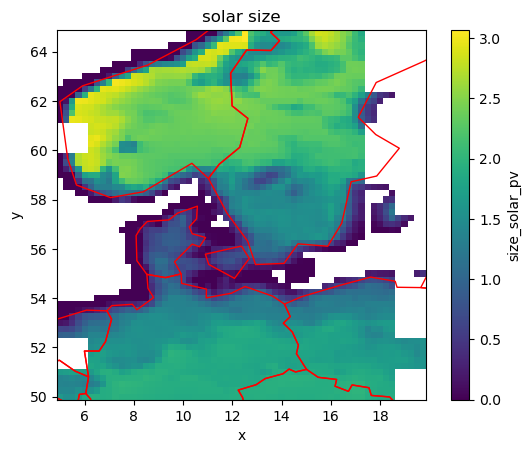

In [46]:
fig, ax = plt.subplots(1)

solution.size_solar_pv.transpose('y', 'x').plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)
plt.title('solar size');



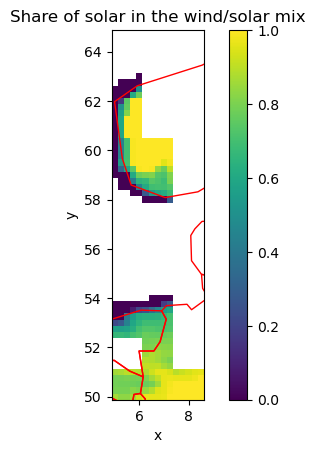

In [31]:
fig, ax = plt.subplots(1)
(solution.size_solar_pv / (solution.size_solar_pv + solution.size_wind)).transpose('y', 'x').plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)
plt.title('Share of solar in the wind/solar mix');

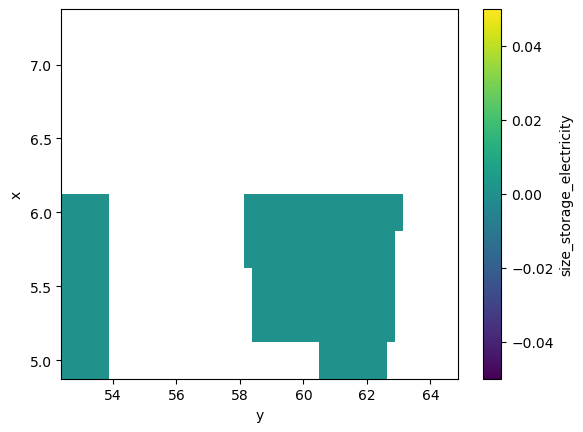

In [13]:
solution.size_storage_electricity.plot()

In [25]:
solution.runtime_solver.min().compute()

<xarray.DataArray 'runtime_solver' ()>
array(61.34)

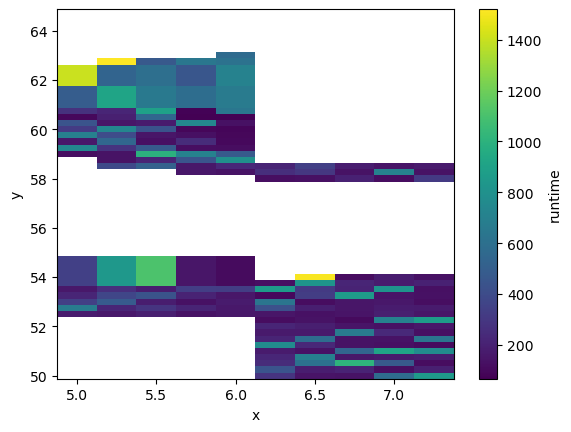

In [21]:
solution.runtime.plot()

In [50]:
import glob
fnames = glob.glob(str(INTERIM_DIR / 'pv' / 'pv_2011-*.nc'))
pv = xr.open_mfdataset(fnames)['specific generation']

In [49]:
import glob
fnames = glob.glob(str(INTERIM_DIR / 'wind' / 'wind_2011-*.nc'))
wind = xr.open_mfdataset(fnames)['specific generation']

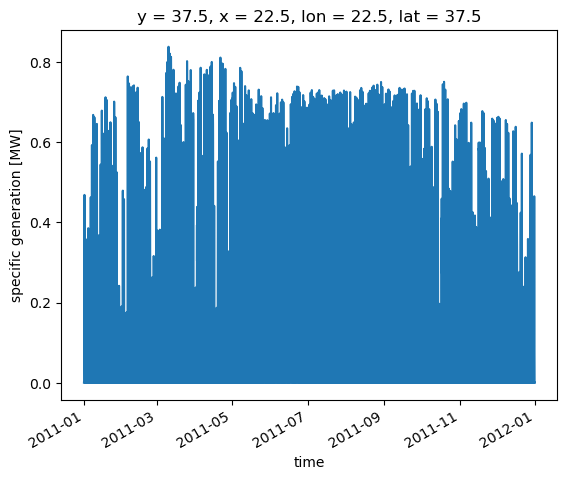

In [43]:
pv.sel(x=solution.x, y=solution.y).isel(x=10, y=10).plot()

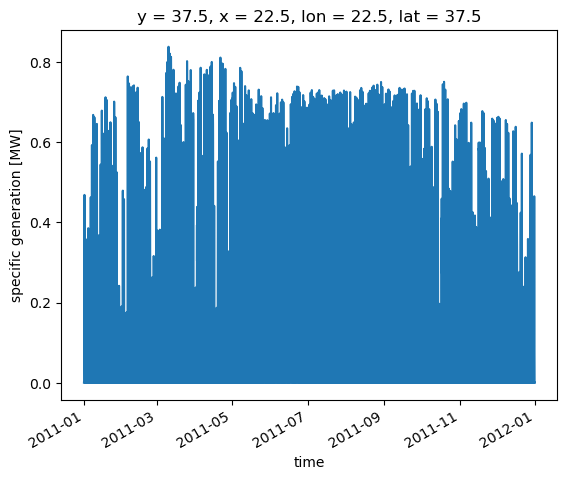

In [43]:
pv.sel(x=solution.x, y=solution.y).isel(x=10, y=10).mean()

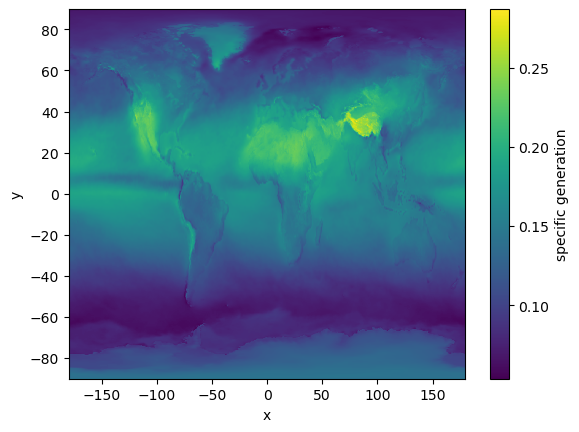

In [41]:
pv.mean(dim='time').plot()

In [39]:
import glob
fnames = glob.glob(str(INPUT_DIR / 'era5' / 'pv_2011-*.nc'))
pv = xr.open_mfdataset(fnames)['specific generation']

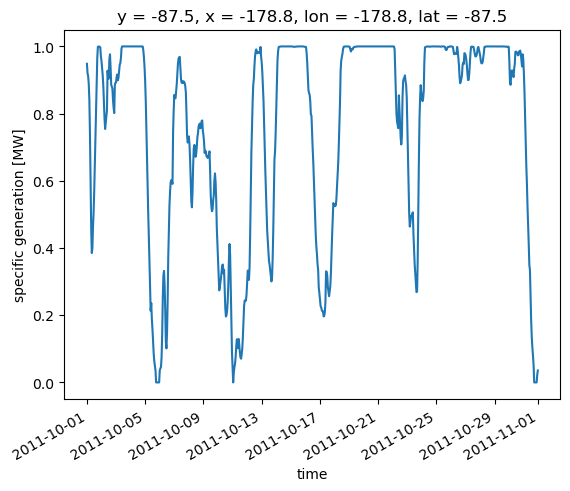

In [30]:
xr.open_dataset(INTERIM_DIR / 'wind' / 'wind_2011-10.nc').isel(x=5, y=10)['specific generation'].plot()

In [23]:
land_sea_mask = xr.open_dataset(INPUT_DIR / 'era5' /  'land_sea_mask.nc').lsm

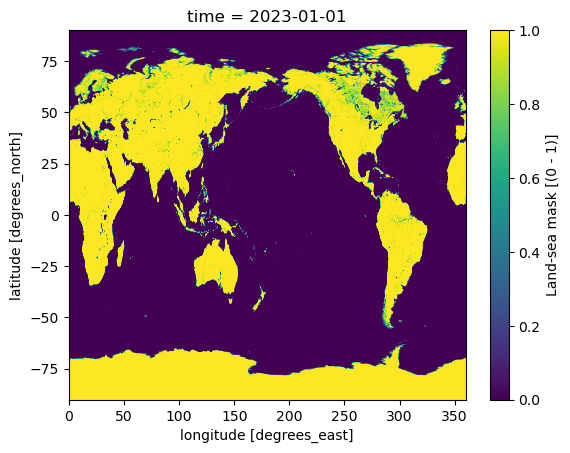

In [24]:
land_sea_mask.plot()

In [22]:
pixel = solution.isel(x=0,y=0)
land_sea_mask.sel(longitude=pixel.x, latitude=pixel.y) == 1

<xarray.DataArray 'lsm' (time: 1)>
array([False])
Coordinates:
    longitude  float32 20.0
    latitude   float32 35.0
  * time       (time) datetime64[ns] 2023-01-01
    x          float64 20.0
    y          float64 35.0

In [57]:
watermask.longitude

<xarray.DataArray 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes:
    units:      degrees_east
    long_name:  longitude

In [5]:
700*1200/(30*40)*7/24

204.16666666666666

In [74]:
for f in fnames[-18:-13]:
    print(xr.open_dataset(f).y)

<xarray.DataArray 'y' (y: 5)>
array([42.5 , 42.75, 43.  , 43.25, 43.5 ])
Coordinates:
  * y        (y) float64 42.5 42.75 43.0 43.25 43.5
<xarray.DataArray 'y' (y: 5)>
array([46.25, 46.5 , 46.75, 47.  , 47.25])
Coordinates:
  * y        (y) float64 46.25 46.5 46.75 47.0 47.25
<xarray.DataArray 'y' (y: 5)>
array([45.  , 45.25, 45.5 , 45.75, 46.  ])
Coordinates:
  * y        (y) float64 45.0 45.25 45.5 45.75 46.0
<xarray.DataArray 'y' (y: 5)>
array([48.75, 49.  , 49.25, 49.5 , 49.75])
Coordinates:
  * y        (y) float64 48.75 49.0 49.25 49.5 49.75
<xarray.DataArray 'y' (y: 2)>
array([43.25, 43.5 ])
Coordinates:
  * y        (y) float64 43.25 43.5


In [76]:
import glob
fnames = glob.glob(str(INTERIM_DIR / "network_solution-2023-06-08_cplex"  / "*.nc"))
solution = xr.open_mfdataset(sorted(fnames[:-15]))

In [246]:
import glob
fnames = glob.glob(str(INTERIM_DIR / "network_solution"  / "*.nc"))
solutions = [xr.open_dataset(f) for f in fnames]
#solutions = [solution for solution in solutions if solution.variables]

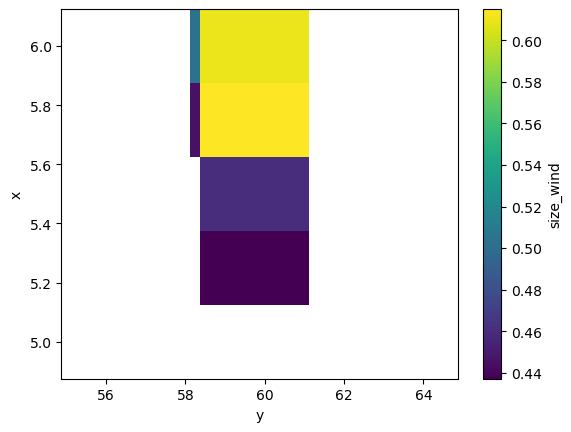

In [248]:
xr.combine_by_coords(solutions).size_wind.plot()

In [216]:
xr.Dataset({k: np.nan for k in ['a', 'b']}).expand_dims(x=[54], y=[23]).a

<xarray.DataArray 'a' (x: 1, y: 1)>
array([[nan]])
Coordinates:
  * x        (x) int64 54
  * y        (y) int64 23

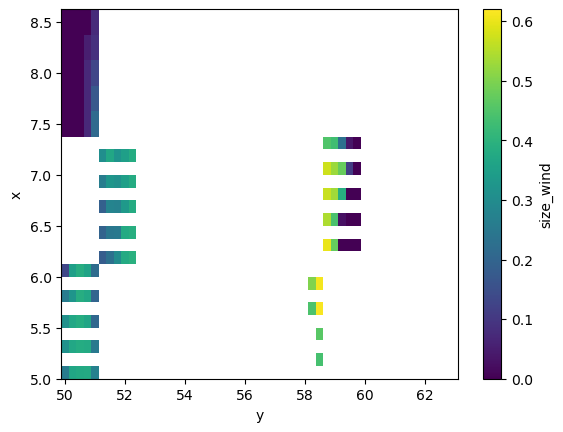

In [171]:
xr.concat(solutions[0:15], dim='x').size_wind.sortby('x').plot()

In [147]:
solutions[0]

<xarray.Dataset>
Dimensions:                          (x: 4, y: 2)
Coordinates:
  * x                                (x) float64 5.25 5.5 5.75 6.0
  * y                                (y) float64 58.25 58.5
Data variables:
    size_solar_pv                    (x, y) float64 ...
    size_wind                        (x, y) float64 ...
    size_storage_electricity         (x, y) float64 ...
    size_storage_electrolizer        (x, y) float64 ...
    size_electrolizer                (x, y) float64 ...
    size_storage_co2                 (x, y) float64 ...
    size_co2                         (x, y) float64 ...
    size_storage_methanol_synthesis  (x, y) float64 ...
    size_methanol_synthesis          (x, y) float64 ...
    runtime_solver                   (x, y) float64 ...
    runtime                          (x, y) float64 ...

In [85]:
for s in solutions:
    #print('y' in s.indexes)
    #print((s.y.diff(dim='y') > 0.).all())
    print(s.y.values)

[58.25 58.5 ]
[53.75]
[52.5  52.75 53.   53.25 53.5 ]
[51.25 51.5  51.75 52.   52.25]
[62.5  62.75 63.  ]
[58.75 59.   59.25 59.5  59.75]
[51.25 51.5  51.75 52.   52.25]
[52.5  52.75 53.   53.25 53.5 ]
[50.   50.25 50.5  50.75 51.  ]
[53.75 54.  ]
[58.   58.25 58.5 ]
[60.   60.25 60.5  60.75 61.  ]


In [87]:
solutions[0]

<xarray.Dataset>
Dimensions:                          (x: 4, y: 2)
Coordinates:
  * x                                (x) float64 5.25 5.5 5.75 6.0
  * y                                (y) float64 58.25 58.5
Data variables:
    size_solar_pv                    (x, y) float64 ...
    size_wind                        (x, y) float64 ...
    size_storage_electricity         (x, y) float64 ...
    size_storage_electrolizer        (x, y) float64 ...
    size_electrolizer                (x, y) float64 ...
    size_storage_co2                 (x, y) float64 ...
    size_co2                         (x, y) float64 ...
    size_storage_methanol_synthesis  (x, y) float64 ...
    size_methanol_synthesis          (x, y) float64 ...
    runtime_solver                   (y, x) float64 ...
    runtime                          (y, x) float64 ...

In [88]:
solutions[-2]

<xarray.Dataset>
Dimensions:                          (x: 5, y: 3)
Coordinates:
  * x                                (x) float64 6.25 6.5 6.75 7.0 7.25
  * y                                (y) float64 58.0 58.25 58.5
Data variables:
    size_solar_pv                    (x, y) float64 ...
    size_wind                        (x, y) float64 ...
    size_storage_electricity         (x, y) float64 ...
    size_storage_electrolizer        (x, y) float64 ...
    size_electrolizer                (x, y) float64 ...
    size_storage_co2                 (x, y) float64 ...
    size_co2                         (x, y) float64 ...
    size_storage_methanol_synthesis  (x, y) float64 ...
    size_methanol_synthesis          (x, y) float64 ...
    runtime_solver                   (y, x) float64 ...
    runtime                          (y, x) float64 ...

In [91]:
xr.concat?

Signature:
xr.concat(
    objs,
    dim,
    data_vars='all',
    coords='different',
    compat: 'CompatOptions' = 'equals',
    positions=None,
    fill_value=<NA>,
    join: 'JoinOptions' = 'outer',
    combine_attrs: 'CombineAttrsOptions' = 'override',
)
Docstring:
Concatenate xarray objects along a new or existing dimension.

Parameters
----------
objs : sequence of Dataset and DataArray
    xarray objects to concatenate together. Each object is expected to
    consist of variables and coordinates with matching shapes except for
    along the concatenated dimension.
dim : Hashable or DataArray or pandas.Index
    Name of the dimension to concatenate along. This can either be a new
    dimension name, in which case it is added along axis=0, or an existing
    dimension name, in which case the location of the dimension is
    unchanged. If dimension is provided as a DataArray or Index, its name
    is used as the dimension to concatenate along and the values are added
    as a coord

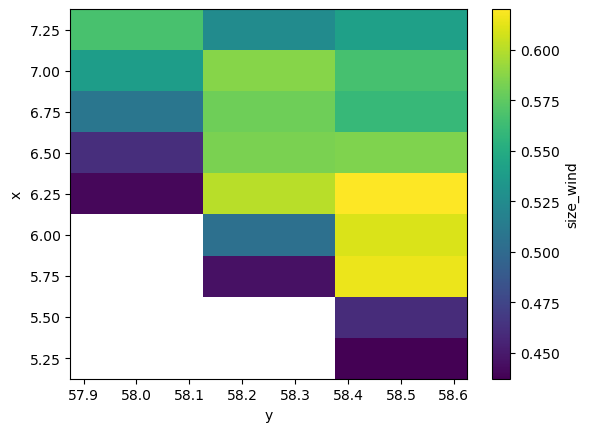

In [93]:
xr.merge((solutions[0], solutions[-2])).size_wind.plot()

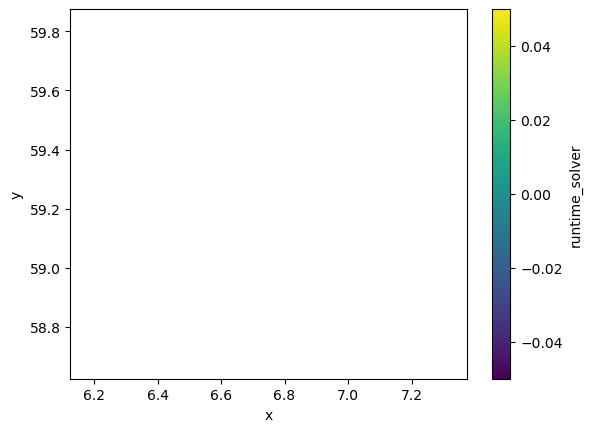

In [50]:
solution.runtime_solver.plot()

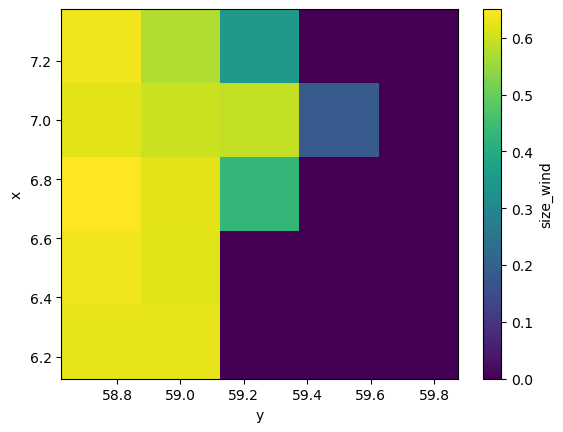

In [47]:
solution.size_wind.plot()

In [26]:
import glob
fnames = glob.glob(str(INTERIM_DIR / "network_solution-2023-06-08_cplex"  / "*.nc"))
solution = xr.open_mfdataset(fnames)

ValueError: Resulting object does not have monotonic global indexes along dimension y

In [27]:
import glob
fnames = glob.glob(str(INTERIM_DIR / "network_solution-2023-06-08_gurobi"  / "*.nc"))
solution = xr.open_mfdataset(fnames)

ValueError: Resulting object does not have monotonic global indexes along dimension y